## MeshIO Package

In [3]:
import meshio
import matplotlib.pyplot as plt
from python.nlocal import Mesh
import numpy as np
import gmsh


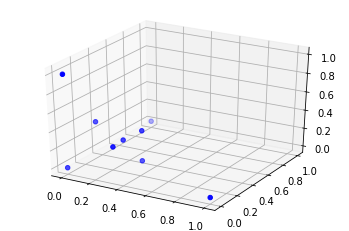

array([0.   , 0.025, 0.025, 0.025, 0.025, 0.225, 0.225, 0.225, 0.225])

In [95]:
import numpy
import quadpy

scheme = quadpy.nsimplex.stroud_1961(3)


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = scheme.points[:,0]
y = scheme.points[:,1]
z = scheme.points[:,2]



ax.scatter(x, y, z, c='b', marker='o')
plt.show()
scheme.weights

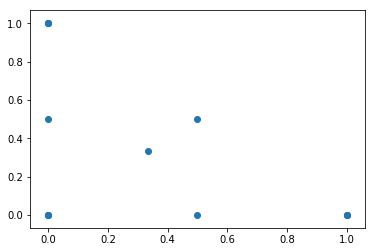

In [77]:
import numpy
import quadpy

scheme = quadpy.nsimplex.stroud_1961(2)
scheme.weights

import matplotlib.pyplot as plt
plt.scatter(np.array([0,0,1]), np.array([0,1,0]), c="b")
plt.scatter(scheme.points[:,0], scheme.points[:,1])
plt.show()

<meshio mesh object>
  Number of points: 735
  Number of cells:
    line: 146
    triangle: 1386
  Cell data: gmsh:geometrical, gmsh:physical
1
Vertex Labels 393


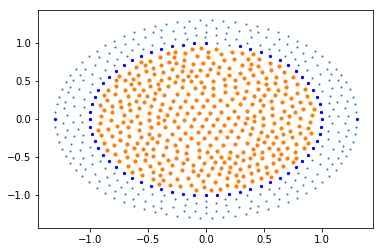

64


meshio._mesh.Mesh

In [4]:
# 2D Case
mesh = meshio.read("data/circle.msh")

print(mesh)


T = mesh.cells["triangle"][np.where(mesh.cell_data["triangle"]["gmsh:physical"]==1)]

nE = mesh.cells["triangle"].shape[0]
volumeName = mesh.cell_data["triangle"]["gmsh:physical"]
nE_Omega = np.sum(volumeName == volumeName[0])
nV = mesh.points.shape[0]

print(volumeName[0])
#for i in range(1):#nE_Omega):
#    plt.fill(mesh.points[T][i,:,0], mesh.points[T][i,:,1], fill=False)
#plt.show()

elementName = "triangle"
Elements = mesh.cells[elementName]
interactionLabel = 2
domainLabel  =1

ElementLabels = mesh.cell_data[elementName]["gmsh:physical"]
VertexLabels = np.full(nV, domainLabel)
for i, label in enumerate(ElementLabels):
    if label == interactionLabel:
        Vdx = Elements[i]
        VertexLabels[Vdx] = interactionLabel
print("Vertex Labels", np.sum( VertexLabels == domainLabel))

plt.scatter(mesh.points[:,0], mesh.points[:,1], s=1)

interior = mesh.points[np.where(VertexLabels == domainLabel)]
plt.scatter(interior[:,0], interior[:,1], s=10)

edge = mesh.points[np.unique(mesh.cells["line"].flatten())[:64]]
plt.scatter(edge[:,0], edge[:,1], s=5, c="b")

plt.show()

print(np.sum(mesh.cell_data["line"]["gmsh:physical"]==9))
mesh.__class__

In [2]:
from python.nlocal import MeshIO
from python.conf import *
confDict = {"domainPhysicalName": 1, "boundaryPhysicalName": 9, "interactiondomainPhysicalName": 2,
            "boundaryConditionType": boundaryConditionType, "ansatz": ansatz}
    
MeshIO("data/circle.msh", **confDict)

9 9
1 1
In assemble.pyx, Dimension assumed to be 2 D.


<meshio mesh object>
  Number of points: 735
  Number of cells:
    line: 146
    triangle: 1386
  Cell data: gmsh:geometrical, gmsh:physical

In [13]:
import scipy.sparse as sp
import numpy as np
# csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
n = 10
data = np.ones(n)
row_ind = np.arange(n)
col_ind = np.arange(1, n+1)

Asp = sp.csr_matrix((data, ( row_ind, col_ind)))
print(Asp.todense())
sp.csgraph(Asp)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


TypeError: 'module' object is not callable

In [ ]:
from python.conf import *
from python.nlocal import Mesh
mesh = Mesh("data/circle.msh", ansatz, boundaryConditionType)

plt.scatter(mesh.vertices[:, 0], mesh.vertices[:,1], s=10, alpha= .2)
#interior = mesh.vertices[:mesh.nV_Omega]
#plt.scatter(interior[:,0], interior[:,1], s=10)

#mesh.vertices.shape[0]

In [ ]:
# 3D
mesh = meshio.read("data/cube3.msh")
if mesh.cells.get("tetra", None) is not None:
    print("Line")
mesh.cell_data

In [ ]:
T = mesh.cells["triangle"][0:2]
mesh.field_data["dOmega"]


           This uses the "line intersecting a circle" algorithm
           from:

               Vince, John.  *Geometry for Computer Graphics: Formulae,
               Examples & Proofs.*  London: Springer-Verlag, 2005.

In [ ]:
#!/home/klar/.venv/bin/python3
#-*- coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from numpy.linalg import norm, solve
import pickle as pkl
import matplotlib.pyplot as plt
import time
from conf import mesh_name, delta, ansatz, py_P, weights, SOLVE
from nlocal import Mesh#, assemble # Mesh class
from aux import filename
from plot import plot
from assemble import assemble
from scipy.interpolate import griddata

In [ ]:
def plot(x_center, delta, TE, RD, fnm= "test"):
   
    pp = PdfPages(fnm + ".pdf")
    ax = plt.gca()
    plt.gca().set_aspect('equal')
    grid = np.arange(-1 - delta, 1 + delta, delta)
    plt.yticks(grid)
    plt.xticks(grid)
    #plt.grid(True, color='black', lw=0.1, alpha=.6)
    # Circle and Center
    plt.scatter(x_center[0], x_center[1], s=1, c="blue")
    circ = plt.Circle(x_center, delta, fill=False, color="b",lw=.1, alpha=.7)
    ax.add_artist(circ)

    if RD.size >0:
        plt.scatter(RD[:,0], RD[:,1], s=5)

    plt.scatter(TE[:,0], TE[:,1], s=3, c="red")
    plt.plot(TE[:,0], TE[:,1], color="red")
    
    plt.savefig(pp, format='pdf')
    plt.close()

    pp.close()


In [ ]:
np.random.seed(1)
x_center = np.array([.3,.7])
#x_center = np.ones(2)
# Fetch some Triangle Close by
TE = np.array([[0,0],[0,1],[1,1]])
delta = .4
dist = lambda x,y: np.linalg.norm(x-y)

In [ ]:
def directed_normal(orth, direction):
    v = np.ones(2)
    if orth[0]==0:
        v[1]=0
        v = v/np.linalg.norm(v)
        sign = np.sign(direction @ v)
        return v*sign
    else:
        v[0] = -orth[1]/orth[0]
        v = v/np.linalg.norm(v)
        sign = np.sign(direction @ v)
        return v*sign
x = np.random.rand(2)
v = directed_normal(x, np.ones(2))
print(x@v)

In [ ]:
RD = []
on_edge = False
first_on_edge = 1

for k in range(3):
    edg0 = k
    edg1 = (k+1) % 3
    
    p = TE[edg0]
    q = TE[edg1]
    a = q - x_center
    b = p-q
    
    v = (a@b)**2 - (a@a - delta**2)*(b@b)
    #print(v)
    
    if (v>=0):
        term1 = -a@b/(b@b)
        term2 = np.sqrt(v) / (b@b)
        lam1 = term1 + term2
        lam2 = term1 - term2
        
        y1 = lam1*(p-q) + q
        y2 = lam2*(p-q) + q
        
        if dist(p, x_center) <= delta:
            RD.append(p)
            on_edge = False
        if 0 <= lam1 <= 1:
            first_on_edge *= len(RD)
            if on_edge:
                y0 = RD[-1]
                s = y0/2 + y1/2
                s_direction = directed_normal(y1-y0, p)
                #s_scaling = scale_toCircle(x_center, )
                RD.append(s+ s_direction*.1)
            RD.append(y1)
            on_edge = True
        if (0 <= lam2 <= 1) and (lam1 != lam2):
            first_on_edge *= len(RD)
            if on_edge:
                y0 = RD[-1]
                s = y0/2 + y2/2
                RD.append(s)
            RD.append(y2)
            on_edge = True
if on_edge and first_on_edge==0:
    s = RD[-1]/2+RD[0]/2
    RD.append(s)
#print(RD)
plot(x_center, delta, TE, np.array(RD), "Retriangulate")

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(py_P[:,0], py_P[:,1])
for k in range(len(py_P)):
    plt.annotate(k, py_P[k])
plt.show()